In [18]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [19]:
#read in csv
datasetPath = 'depth_train_dataset.csv'
dataList = []
labelList = []
for i, row in enumerate(open(datasetPath)):
    if i == 0: continue #skip first row, header rown
    # parse the label and image from the row
    row = row.split(",")
    #print(row)
    label = int(row[0])
    datarow = np.array([x for x in row[1:6]], dtype="float32")
    
    #print(datarow)
    
    dataList.append(datarow)
    labelList.append(label)
data = np.array(dataList, dtype="float32")
labels = np.array(labelList, dtype="int")

#then scale the data
sc = StandardScaler()
data = sc.fit_transform(data)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=3) # 70% training and 30% test



In [4]:
print(X_train[:,1])

[ 1.19312674e-01  4.43541378e-01  1.12820350e-01 -5.00548601e-01
 -1.12188804e+00  1.19312674e-01  1.26082289e+00 -3.67089003e-01
 -1.51007402e+00  2.92467972e-04 -1.35369897e+00 -1.01480281e+00
 -1.26550841e+00  8.42169344e-01  6.00639820e-01  6.05683208e-01
  1.68531215e+00 -1.17721593e+00 -7.40076303e-01 -1.12752914e+00
  1.42168927e+00  1.25750971e+00  4.07892615e-01  1.64692068e+00
  4.32045937e-01 -8.94514263e-01  1.22712575e-01  1.19312674e-01
 -1.35260701e+00 -1.98810980e-01  1.88914347e+00 -1.86193809e-01
 -1.33885074e+00  1.76819158e+00  3.66376638e-02  4.96028036e-01
 -4.99416411e-01  1.19312674e-01 -2.05435783e-01  1.19312674e-01
 -8.76858592e-01  4.83678952e-02  1.89260459e+00  6.80830538e-01
 -8.54586244e-01  8.22616577e-01 -1.04769278e+00  1.99471805e-02
  1.82799387e+00  1.62750840e-01 -1.13364434e+00 -1.17404163e+00
 -8.31029773e-01  1.15130357e-01  1.64185429e+00  1.38168967e+00
 -1.02542353e+00  8.83773446e-01  5.30739069e-01  1.19312674e-01
 -3.61489922e-01 -1.92345

In [21]:
#SVM Polynomial model ###USED
#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=4, class_weight='balanced', gamma='scale', random_state=15, probability=True) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_trainpred = clf.predict(X_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

print("TRAIN")

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_trainpred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_train, y_trainpred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_train, y_trainpred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_train, y_trainpred))

print("TEST")

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))

TRAIN
Accuracy: 0.971473851030111
Precision: 0.6046511627906976
Recall: 0.9629629629629629
F1 Score: 0.7428571428571429
TEST
Accuracy: 0.974169741697417
Precision: 0.75
Recall: 0.9473684210526315
F1 Score: 0.8372093023255814


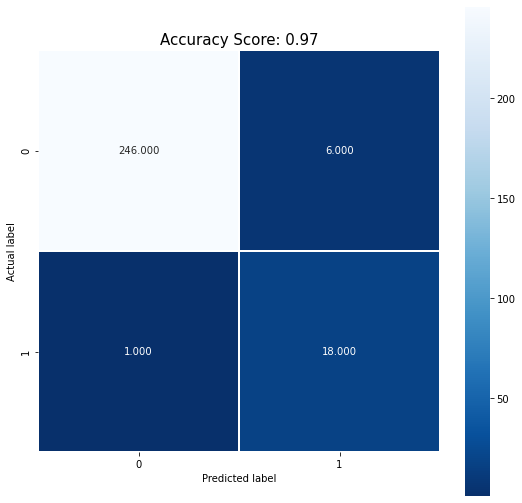

In [22]:
score = clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score)
plt.title(all_sample_title, size = 15);

In [23]:
#from: https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/
from pickle import dump
# save the model
dump(clf, open('word_number_model_prob.pkl', 'wb'))
# save the scaler
dump(sc, open('word_number_scaler_prob.pkl', 'wb'))

In [15]:
print(y_pred)
print("{:.2f}%".format(y_pred_prob*100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1]


TypeError: unsupported format string passed to numpy.ndarray.__format__